In [1]:
import sys

from pathlib import Path
from datetime import timedelta

import dateutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import trange
from TaPR_pkg import etapr

In [2]:
TRAIN_DATASET = sorted([x for x in Path("data/train/").glob("*.csv")])
TRAIN_DATASET

TEST_DATASET = sorted([x for x in Path("data/test/").glob("*.csv")])
TEST_DATASET

VALIDATION_DATASET = sorted([x for x in Path("data/validation/").glob("*.csv")])
VALIDATION_DATASET

[WindowsPath('data/validation/validation.csv')]

In [11]:
def dataframe_from_csv(target):
    return pd.read_csv(target, parse_dates=True, index_col = "timestamp").rename(columns=lambda x: x.strip())

def dataframe_from_csvs(targets):
    return pd.concat([dataframe_from_csv(x) for x in targets])

In [4]:
# train_df_1 = pd.read_csv("data/train/train1.csv")
# train_df_1
train_set = []

for i in range(1,7):
    train_set.append(pd.read_csv("data/train/train" + str(i) + ".csv", parse_dates=True, index_col = "timestamp"))
    
train_set

[                        C01  C02       C03      C04       C05     C06  \
 timestamp                                                               
 2021-07-11 10:00:00 -2.2642    0  12.26196 -0.00087  12.01019  0.2254   
 2021-07-11 10:00:01 -2.4923    0  12.26196  0.00058  12.56714 -0.0711   
 2021-07-11 10:00:02 -2.8460    0  12.26196 -0.00072  14.48975  0.0051   
 2021-07-11 10:00:03 -2.1235    0  12.26196  0.00101  15.93170  0.1842   
 2021-07-11 10:00:04 -2.9074    0  12.26196  0.00043  16.10718  0.1842   
 ...                     ...  ...       ...      ...       ...     ...   
 2021-07-12 11:59:56 -1.8452    0  12.26959 -0.00398  13.26904  0.4181   
 2021-07-12 11:59:57 -1.8657    0  12.26959 -0.00354  13.26904  0.3960   
 2021-07-12 11:59:58 -1.8643    0  12.26959  0.00065  13.26904  0.3960   
 2021-07-12 11:59:59 -1.8931    0  12.26959  0.00065  13.26904  0.3778   
 2021-07-12 12:00:00 -1.8975    0  12.26959 -0.00058  13.26904  0.3770   
 
                           C07  C08 

In [12]:
TRAIN_DF_RAW = dataframe_from_csvs(TRAIN_DATASET)
TRAIN_DF_RAW

,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10,...,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-07-11 10:00:00,-2.2642,0,12.26196,-0.00087,12.01019,0.2254,12.66931,70,1,50,...,0.92255,30.08042,7.08818,595.06104,276.40338,1,1014.79321,12.0,50,3506
2021-07-11 10:00:01,-2.4923,0,12.26196,0.00058,12.56714,-0.0711,12.66931,70,1,50,...,0.92255,30.08423,7.08818,531.50317,276.18634,1,1014.79321,12.0,50,3493
2021-07-11 10:00:02,-2.8460,0,12.26196,-0.00072,14.48975,0.0051,12.66931,70,1,50,...,0.91873,30.09148,7.08818,451.06253,279.85754,1,1014.79321,12.0,50,3490
2021-07-11 10:00:03,-2.1235,0,12.26196,0.00101,15.93170,0.1842,12.66931,70,1,50,...,0.91644,30.10407,7.08818,404.38739,281.50317,1,1014.79321,12.0,50,3525
2021-07-11 10:00:04,-2.9074,0,12.26196,0.00043,16.10718,0.1842,12.66931,70,1,50,...,0.91797,30.10331,7.08818,382.53925,281.34039,1,1014.79321,12.0,50,3503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-09 08:59:56,-2.0065,0,12.26196,0.00051,100.28228,0.5977,12.53358,70,1,50,...,1.17355,35.05434,10.00000,3178.48877,370.02679,1,986.05908,12.0,50,136
2021-08-09 08:59:57,-2.2101,0,12.26196,-0.00029,100.28228,0.5509,12.53358,70,1,50,...,1.16898,35.03488,10.00000,3175.36084,370.40656,1,986.05908,12.0,50,89
2021-08-09 08:59:58,-2.3325,0,12.26196,0.00152,100.28228,0.5425,12.53358,70,1,50,...,1.16974,35.02840,10.00000,3175.73608,368.12787,1,986.05908,12.0,50,90


In [14]:
TRAIN_DF_RAW.columns

Index(['C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10',
       'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30',
       'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40',
       'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C50',
       'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58', 'C59', 'C60',
       'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68', 'C69', 'C70',
       'C71', 'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C78', 'C79', 'C80',
       'C81', 'C82', 'C83', 'C84', 'C85', 'C86'],
      dtype='object')

In [16]:
# TIMESTAMP_FIELD = "timestamp"
# VALID_COLUMNS_IN_TRAIN_DATASET = TRAIN_DF_RAW.columns.drop([TIMESTAMP_FIELD])
# for i in range(6):
#     train_set[i].columns.drop([TIMESTAMP_FIELD])
# VALID_COLUMNS_IN_TRAIN_DATASET

TAG_MIN = TRAIN_DF_RAW.min()
TAG_MAX = TRAIN_DF_RAW.max()

def normalize(df):
    ndf = df.copy()
    for c in df.columns:
        if TAG_MIN[c] == TAG_MAX[c]:
            ndf[c] = df[c] - TAG_MIN[c]
        else:
            ndf[c] = (df[c] - TAG_MIN[c]) / (TAG_MAX[c] - TAG_MIN[c])
    return ndf


TRAIN_DF = normalize(TRAIN_DF_RAW[VALID_COLUMNS_IN_TRAIN_DATASET]).ewm(alpha=0.9).mean()
TRAIN_DF

,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10,...,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-07-11 10:00:00,0.433107,0.0,0.056338,0.501686,0.116706,0.447955,0.816071,0.0,0.0,0.0,...,0.240561,0.194185,0.708818,0.183693,0.169066,0.0,0.538147,0.0,0.0,0.276078
2021-07-11 10:00:01,0.395098,0.0,0.056338,0.517560,0.121738,0.397053,0.816071,0.0,0.0,0.0,...,0.240561,0.194535,0.708818,0.165517,0.168332,0.0,0.538147,0.0,0.0,0.275176
2021-07-11 10:00:02,0.333267,0.0,0.056338,0.504886,0.139408,0.405431,0.816071,0.0,0.0,0.0,...,0.238319,0.195226,0.708818,0.141083,0.180570,0.0,0.538147,0.0,0.0,0.274889
2021-07-11 10:00:03,0.446345,0.0,0.056338,0.522383,0.154058,0.436703,0.816071,0.0,0.0,0.0,...,0.236754,0.196440,0.708818,0.125447,0.187292,0.0,0.538147,0.0,0.0,0.277264
2021-07-11 10:00:04,0.328324,0.0,0.056338,0.517845,0.157091,0.439827,0.816071,0.0,0.0,0.0,...,0.237495,0.196492,0.708818,0.117700,0.187419,0.0,0.538147,0.0,0.0,0.275990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-09 08:59:56,0.485034,0.0,0.056340,0.515751,0.994085,0.520004,0.640361,0.0,0.0,0.0,...,0.403941,0.696846,1.000000,0.996289,0.517805,0.0,0.414192,0.0,0.0,0.018717
2021-08-09 08:59:57,0.447224,0.0,0.056338,0.509379,0.994085,0.510481,0.640361,0.0,0.0,0.0,...,0.401381,0.695028,1.000000,0.995484,0.518674,0.0,0.414192,0.0,0.0,0.015676
2021-08-09 08:59:58,0.423251,0.0,0.056338,0.528358,0.994085,0.508101,0.640361,0.0,0.0,0.0,...,0.401571,0.694256,1.000000,0.995510,0.511131,0.0,0.414192,0.0,0.0,0.015440


<AxesSubplot:xlabel='timestamp'>

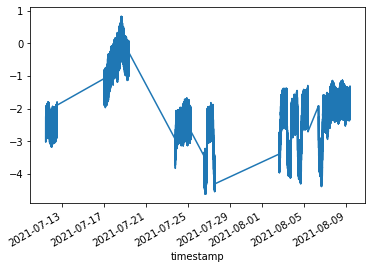

In [15]:
TRAIN_DF_RAW['C01'].plot()    # 정규화 전

<AxesSubplot:xlabel='timestamp'>

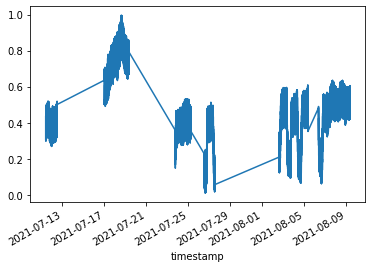

In [18]:
TRAIN_DF['C01'].plot()    # 정규화 후

In [20]:
train_set    # 정규화 전

[                        C01  C02       C03      C04       C05     C06  \
 timestamp                                                               
 2021-07-11 10:00:00 -2.2642    0  12.26196 -0.00087  12.01019  0.2254   
 2021-07-11 10:00:01 -2.4923    0  12.26196  0.00058  12.56714 -0.0711   
 2021-07-11 10:00:02 -2.8460    0  12.26196 -0.00072  14.48975  0.0051   
 2021-07-11 10:00:03 -2.1235    0  12.26196  0.00101  15.93170  0.1842   
 2021-07-11 10:00:04 -2.9074    0  12.26196  0.00043  16.10718  0.1842   
 ...                     ...  ...       ...      ...       ...     ...   
 2021-07-12 11:59:56 -1.8452    0  12.26959 -0.00398  13.26904  0.4181   
 2021-07-12 11:59:57 -1.8657    0  12.26959 -0.00354  13.26904  0.3960   
 2021-07-12 11:59:58 -1.8643    0  12.26959  0.00065  13.26904  0.3960   
 2021-07-12 11:59:59 -1.8931    0  12.26959  0.00065  13.26904  0.3778   
 2021-07-12 12:00:00 -1.8975    0  12.26959 -0.00058  13.26904  0.3770   
 
                           C07  C08 

In [21]:
# TRAIN_DF = normalize(TRAIN_DF_RAW[VALID_COLUMNS_IN_TRAIN_DATASET]).ewm(alpha=0.9).mean()

for i in range(6):
    train_set[i] = normalize(train_set[i]).ewm(alpha=0.9).mean()

train_set


[                          C01  C02       C03       C04       C05       C06  \
 timestamp                                                                    
 2021-07-11 10:00:00  0.433107  0.0  0.056338  0.501686  0.116706  0.447955   
 2021-07-11 10:00:01  0.395098  0.0  0.056338  0.517560  0.121738  0.397053   
 2021-07-11 10:00:02  0.333267  0.0  0.056338  0.504886  0.139408  0.405431   
 2021-07-11 10:00:03  0.446345  0.0  0.056338  0.522383  0.154058  0.436703   
 2021-07-11 10:00:04  0.328324  0.0  0.056338  0.517845  0.157091  0.439827   
 ...                       ...  ...       ...       ...       ...       ...   
 2021-07-12 11:59:56  0.510224  0.0  0.057903  0.466770  0.129212  0.484693   
 2021-07-12 11:59:57  0.506557  0.0  0.057903  0.469256  0.129218  0.480624   
 2021-07-12 11:59:58  0.506421  0.0  0.057903  0.514917  0.129218  0.480217   
 2021-07-12 11:59:59  0.501657  0.0  0.057903  0.519483  0.129218  0.477083   
 2021-07-12 12:00:00  0.500454  0.0  0.057903  0.506

In [ ]:
def show_graph(target):
    target. 

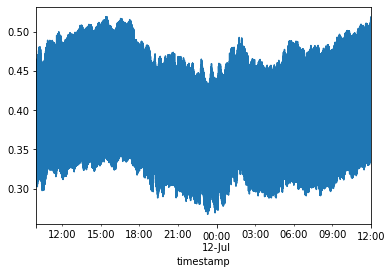

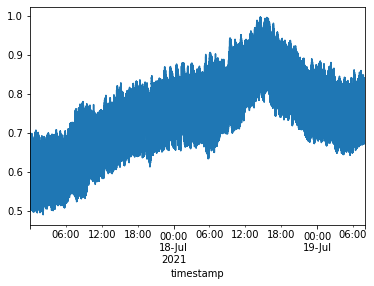

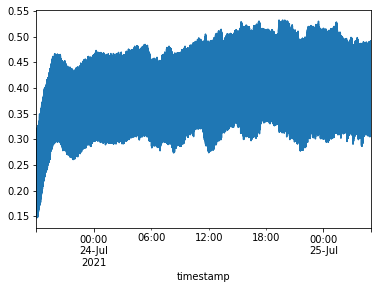

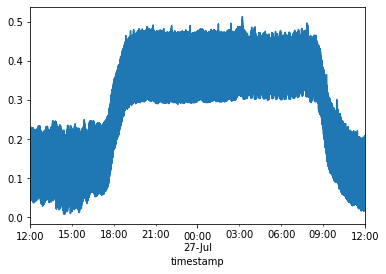

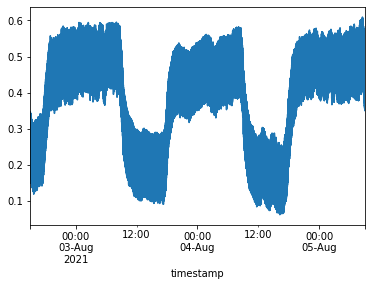

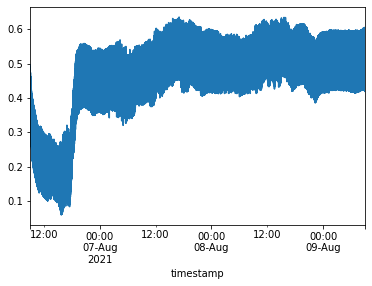

In [22]:
for i in range(6):
    train_set[i]['C01'].plot()
    plt.show()

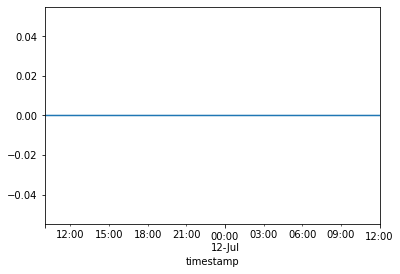

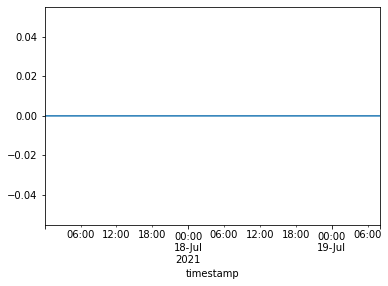

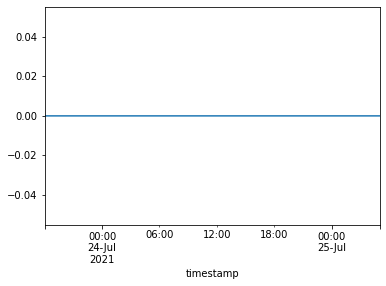

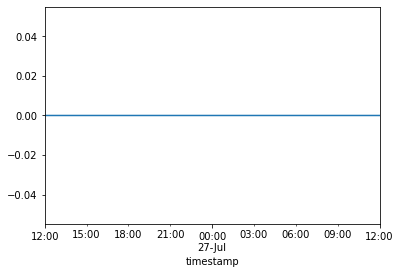

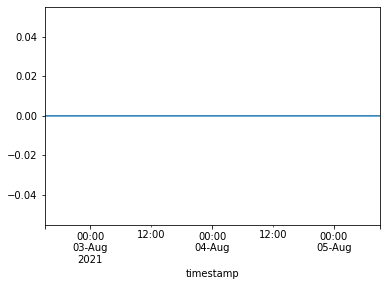

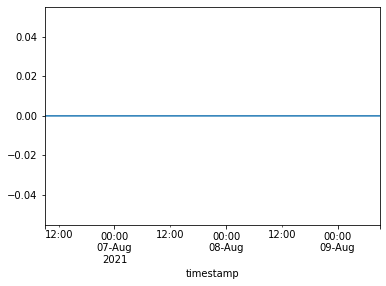

In [23]:
# plt.figure(figsize=(10,5))
# plt.rc('xtick', labelsize=15)
# plt.rc('ytick', labelsize=15)
# plt.rc('xtick', labelsize=10)
# plt.rc('ytick', labelsize=10)

for i in range(6):
    train_set[i]['C02'].plot()
    plt.show()

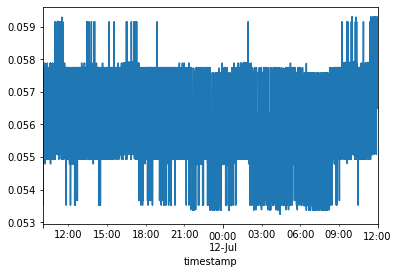

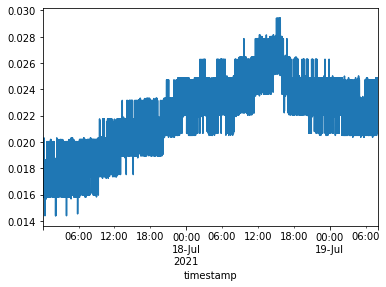

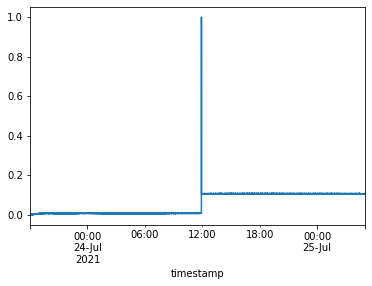

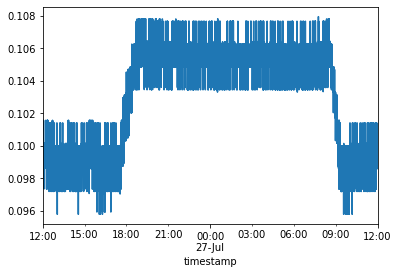

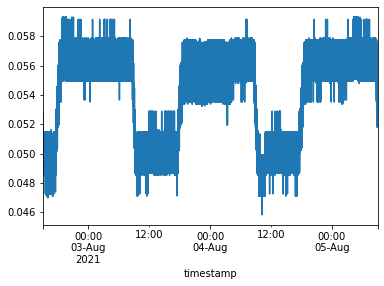

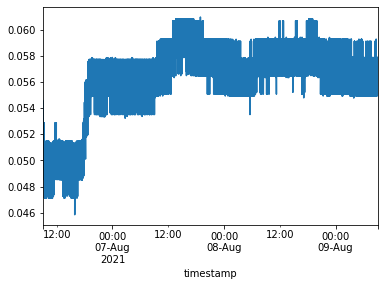

In [25]:
for i in range(6):
    train_set[i]['C03'].plot()
    plt.show()